# T11 Machine learning model

## 1. Problem definition
        
        We have to predict what percentage of users will return to the game tomorrow. This KPI is officially known as Retention Day 1. I think we should use regression model.
    
## 2. Data
        
        We've gotten time series data from 02.06.2022. to 15.09.2022. But for data from 31.08.2022 t0 15.09.2022. we have to predict tagret variable (returned).
## 3. Evaluation
        
        Our result have to be evaluated by RMSE (Root Mean Squared Error on Prediction) for the period after 2022-08-31. So we'll definitely use regression model. We're going to make validation set to check our model
        
## 4. Features
        registration_type:
                            1 = Fresh Registration 
                            2 = Inactive ReRegistration
                            3 = Active ReRegistration
       
       played_t11_before:
                           0 = data not provided
                           1 = user says he played T11 before
                           2 = user says he didn't play T11 before
     
     registration_channel: Label that marks if the new user was targeted by any T11 marketing campaigns, before installing the game.
                           0 = data not provided
                           1 = Organic
                           2 = Paid             CHECK
                           
      network_type:
                    0 = data not provided
                    1 = WIFI
                    2 = LTE (4G)
                    3 = HSPAP (3G)               CHECK
                    
      device_tier: Our internal label for the quality of the device used for playing the game
                    0 = data not provided
                    1 = LowestEnd
                    2 = LowEnd
                    3 = MidEnd
                    4 = HighEnd
      device_type:
                     1 = Phone
                     2 = Tablet
                     
      device_manufacturer:
                        0 = Other + data not provided
                        1 = Samsung
                        2 = Xiaomi
                        3 = OPPO
                        4 = Huawei
                        5 = Motorola
                        6 = Vivo
                        7 = Realme
                        8 = INFINIX MOBILITY LIMITED
                        9 = LGE
                        10 = TECNO MOBILE LIMITED
                        11 = Lenovo
                        12 = OnePlus
                        13 = TCL

        screen_dpi
        device_memory_size_mb
        device_model
        os_version
        registrations


## 5. Model
        SO we're going to use regression model, but I am not sure which one. 
        
## 6. Experiments
        
        We're trying couple model and chose one with best RMSE.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("2. job_fair_retention_prediction_2022_training.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342332 entries, 0 to 342331
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   342332 non-null  object 
 1   registration_type      342332 non-null  int64  
 2   played_t11_before      342332 non-null  int64  
 3   registration_channel   342332 non-null  int64  
 4   network_type           342332 non-null  int64  
 5   device_tier            342332 non-null  int64  
 6   device_type            342332 non-null  int64  
 7   device_manufacturer    342332 non-null  int64  
 8   screen_dpi             340442 non-null  float64
 9   device_memory_size_mb  340442 non-null  float64
 10  device_model           340442 non-null  object 
 11  os_version             340442 non-null  object 
 12  registrations          342332 non-null  int64  
 13  returned               342332 non-null  int64  
dtypes: float64(2), int64(9), object(3)
m

In [4]:
df.isnull().sum()

date                        0
registration_type           0
played_t11_before           0
registration_channel        0
network_type                0
device_tier                 0
device_type                 0
device_manufacturer         0
screen_dpi               1890
device_memory_size_mb    1890
device_model             1890
os_version               1890
registrations               0
returned                    0
dtype: int64

In [5]:
df.describe()

,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,registrations,returned
count,342332.000000,342332.000000,342332.000000,342332.000000,342332.000000,342332.000000,342332.000000,340442.000000,340442.000000,342332.000000,342332.000000
mean,1.577337,1.028610,1.538071,1.272867,2.927082,1.105301,2.326283,359.056964,3996.317517,1.567829,0.406874
std,0.804206,0.892683,0.566776,0.573181,1.028048,0.306942,2.551360,88.342857,1896.398925,1.651584,0.716612
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,80.000000,452.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,315.000000,2789.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,320.000000,3680.000000,1.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,3.000000,440.000000,5572.000000,1.000000,1.000000
max,3.000000,2.000000,2.000000,3.000000,4.000000,2.000000,13.000000,999.000000,17205.000000,70.000000,22.000000


In [6]:
df.head()

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned
0,2022-06-02,3,0,1,1,3,1,2,320.0,2820.0,Xiaomi Redmi 7,Android OS 10 / API-29,1,1
1,2022-06-02,1,2,1,1,4,1,0,480.0,2740.0,OMIX OMIX X300,Android OS 11 / API-30,1,0
2,2022-06-02,3,0,1,1,3,1,1,315.0,3571.0,samsung SM-M215F,Android OS 11 / API-30,1,0
3,2022-06-02,1,2,2,1,2,1,10,320.0,3774.0,TECNO MOBILE LIMITED TECNO KC3,Android OS 9 / API-28,1,1
4,2022-06-02,1,2,2,1,1,1,1,320.0,889.0,samsung SM-A013G,Android OS 10 / API-29,1,0


- We can't shuffle data because we have time series data and some date have more rows
- we have missing values and non numeric values. I think i'll firstly convert all data into numbers, split and then 

In [7]:
df.screen_dpi.median()

320.0

In [8]:
df.screen_dpi.mode()

0    320.0
Name: screen_dpi, dtype: float64

In [9]:
df.os_version.value_counts()

Android OS 11 / API-30       104801
Android OS 10 / API-29        80577
Android OS 12 / API-31        54064
Android OS 9 / API-28         35797
Android OS 8.1.0 / API-27     16038
                              ...  
Android OS 5.0 / API-19           1
Android OS 8.1.1 / API-22         1
Android OS 4.4 / API-19           1
Android OS 7.0.0 / API-22         1
Android OS 10.0 / API-28          1
Name: os_version, Length: 79, dtype: int64

In [10]:
df.tail()

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned
342327,2022-09-15,1,1,2,2,2,1,11,480.0,2848.0,LENOVO Lenovo K53a48,Android OS 7.0 / API-24,1,0
342328,2022-09-15,2,0,2,1,4,1,1,420.0,7443.0,samsung SM-N985F,Android OS 12 / API-31,3,0
342329,2022-09-15,1,1,1,1,3,1,4,320.0,3688.0,HUAWEI MAR-LX1A,Android OS 10 / API-29,1,0
342330,2022-09-15,1,1,1,1,4,1,0,480.0,3748.0,OMIX OMIX X500,Android OS 11 / API-30,2,0
342331,2022-09-15,1,1,2,2,4,1,2,440.0,5613.0,Xiaomi M2101K7BG,Android OS 11 / API-30,2,0


In [11]:
df.device_model.value_counts()

Xiaomi Redmi Note 8 Pro    7380
Xiaomi Redmi Note 8        6643
samsung SM-G610F           5001
Xiaomi M2003J15SC          4735
Xiaomi Redmi Note 9 Pro    4050
                           ... 
samsung SM-J410G              1
LEFE Blade X9                 1
OnePlus IV2201                1
SNCOIA QT19101                1
HUAWEI VKY-AL00               1
Name: device_model, Length: 3236, dtype: int64

In [12]:
df.device_memory_size_mb.mode()

0    3679.0
Name: device_memory_size_mb, dtype: float64

In [13]:
df.device_memory_size_mb.median()

3680.0

 - So missing values in columns 'device_memory_size' and 'screen_dpi' we will fill up with median value
 - And rows with missing device_model and os_version I am going to delete, because I am not sure how it will affect on result if I fill it up with the most common values
 - we have a enough data, so I know that for machine learning is better to have more data but I will try on this way

In [14]:
df['device_memory_size_mb'] = df['device_memory_size_mb'].fillna(df['device_memory_size_mb'].median())


In [15]:
df['screen_dpi'] = df['screen_dpi'].fillna(df['screen_dpi'].median())


In [16]:
df.isna().sum()

date                        0
registration_type           0
played_t11_before           0
registration_channel        0
network_type                0
device_tier                 0
device_type                 0
device_manufacturer         0
screen_dpi                  0
device_memory_size_mb       0
device_model             1890
os_version               1890
registrations               0
returned                    0
dtype: int64

In [17]:
df.dropna(axis=0, how='any', inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340442 entries, 0 to 342331
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   340442 non-null  object 
 1   registration_type      340442 non-null  int64  
 2   played_t11_before      340442 non-null  int64  
 3   registration_channel   340442 non-null  int64  
 4   network_type           340442 non-null  int64  
 5   device_tier            340442 non-null  int64  
 6   device_type            340442 non-null  int64  
 7   device_manufacturer    340442 non-null  int64  
 8   screen_dpi             340442 non-null  float64
 9   device_memory_size_mb  340442 non-null  float64
 10  device_model           340442 non-null  object 
 11  os_version             340442 non-null  object 
 12  registrations          340442 non-null  int64  
 13  returned               340442 non-null  int64  
dtypes: float64(2), int64(9), object(3)
m

In [19]:
df.isnull().sum(), df.shape

(date                     0
 registration_type        0
 played_t11_before        0
 registration_channel     0
 network_type             0
 device_tier              0
 device_type              0
 device_manufacturer      0
 screen_dpi               0
 device_memory_size_mb    0
 device_model             0
 os_version               0
 registrations            0
 returned                 0
 dtype: int64,
 (340442, 14))

In [20]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day_of_week'] = pd.DatetimeIndex(df['date']).dayofweek
df['day_of_month'] = pd.DatetimeIndex(df['date']).day

In [21]:
df.isnull().sum(), df.shape

(date                     0
 registration_type        0
 played_t11_before        0
 registration_channel     0
 network_type             0
 device_tier              0
 device_type              0
 device_manufacturer      0
 screen_dpi               0
 device_memory_size_mb    0
 device_model             0
 os_version               0
 registrations            0
 returned                 0
 month                    0
 day_of_week              0
 day_of_month             0
 dtype: int64,
 (340442, 17))

In [22]:
# So now we can split data into train and test set

In [23]:
df[10000:10015]

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned,month,day_of_week,day_of_month
10061,2022-06-05,1,2,2,1,3,1,1,320.0,2827.0,samsung SM-N910C,Android OS 6.0.1 / API-23,2,0,6,6,5
10062,2022-06-05,3,0,0,1,3,1,4,480.0,3678.0,HUAWEI PPA-LX2,Android OS 10 / API-29,1,1,6,6,5
10063,2022-06-05,1,2,2,1,3,1,1,280.0,1724.0,samsung SM-A105FN,Android OS 10 / API-29,2,0,6,6,5
10064,2022-06-05,1,2,2,2,2,1,4,480.0,3788.0,HUAWEI WAS-LX1A,Android OS 8.0.0 / API-26,1,1,6,6,5
10065,2022-06-05,1,2,2,1,2,1,0,280.0,2791.0,General Mobile G300,Android OS 10 / API-29,1,0,6,6,5
10066,2022-06-05,1,1,1,1,1,1,1,240.0,1407.0,samsung SM-G532F,Android OS 6.0.1 / API-23,2,0,6,6,5
10067,2022-06-05,1,2,2,0,4,1,2,440.0,5630.0,Xiaomi M2007J20CG,Android OS 11 / API-30,1,1,6,6,5
10068,2022-06-05,1,2,1,2,4,1,4,480.0,5689.0,HUAWEI JNY-LX1,Android OS 10 / API-29,1,0,6,6,5
10069,2022-06-05,3,0,2,2,2,1,1,280.0,1791.0,samsung SM-A107F,Android OS 11 / API-30,2,1,6,6,5
10070,2022-06-05,3,0,2,0,4,1,7,320.0,3784.0,realme RMX3269,Android OS 11 / API-30,1,1,6,6,5


In [24]:
df['device_brand'] = df['device_model'].str.split(' ').str[0]

In [25]:
df.drop('device_brand', axis=1, inplace=True)
# I've realized so late we have similar column

In [26]:
df.shape

(340442, 17)

In [219]:
# here is code for column part of month

In [68]:
"""count1 =0
count2 =0
for i in list_days:
    if list_days[i]==2:
        count1=count1+1
    else:
        count2=count2+1"""

'count1 =0\ncount2 =0\nfor i in list_days:\n    if list_days[i]==2:\n        count1=count1+1\n    else:\n        count2=count2+1'

### Split data into training and test sets

     We're going to make train/test set, see correlations in train set. And after that turn everything into numbers, split df_train into train and validation(10%) and try to fit

In [69]:
df.month.value_counts()

8    102381
7     96067
6     92960
9     49034
Name: month, dtype: int64

In [70]:
df_test = df[df.month == 9]
df_train = df[df.month != 9]

In [71]:
len(df_test), len(df_train), df_test.shape, df_train.shape

(49034, 291408, (49034, 17), (291408, 17))

In [72]:
df_train.head(5)

,date,registration_type,played_t11_before,registration_channel,network_type,device_tier,device_type,device_manufacturer,screen_dpi,device_memory_size_mb,device_model,os_version,registrations,returned,month,day_of_week,day_of_month
0,2022-06-02,3,0,1,1,3,1,2,320.0,2820.0,Xiaomi Redmi 7,Android OS 10 / API-29,1,1,6,3,2
1,2022-06-02,1,2,1,1,4,1,0,480.0,2740.0,OMIX OMIX X300,Android OS 11 / API-30,1,0,6,3,2
2,2022-06-02,3,0,1,1,3,1,1,315.0,3571.0,samsung SM-M215F,Android OS 11 / API-30,1,0,6,3,2
3,2022-06-02,1,2,2,1,2,1,10,320.0,3774.0,TECNO MOBILE LIMITED TECNO KC3,Android OS 9 / API-28,1,1,6,3,2
4,2022-06-02,1,2,2,1,1,1,1,320.0,889.0,samsung SM-A013G,Android OS 10 / API-29,1,0,6,3,2


### Check correlations between target and features into train data

#### Date vs returned (returned/registrations)

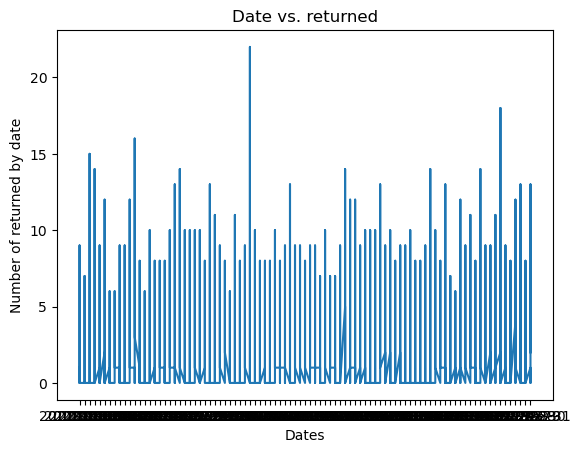

In [131]:
fig, ax = plt.subplots()
ax.plot(df_train.date, df_train.returned);
ax.set(title="Date vs. returned",
      ylabel="Number of returned by date",
      xlabel="Dates");
    

<AxesSubplot:>

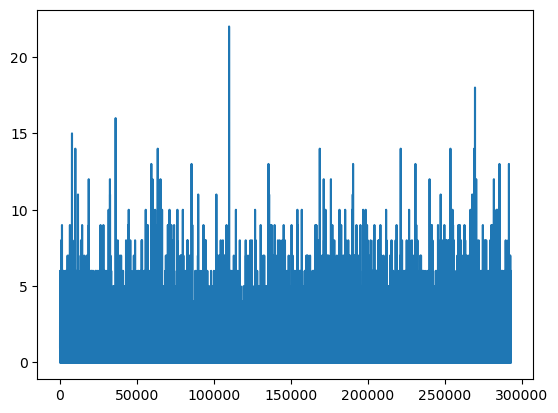

In [105]:
df_train['returned'].plot()

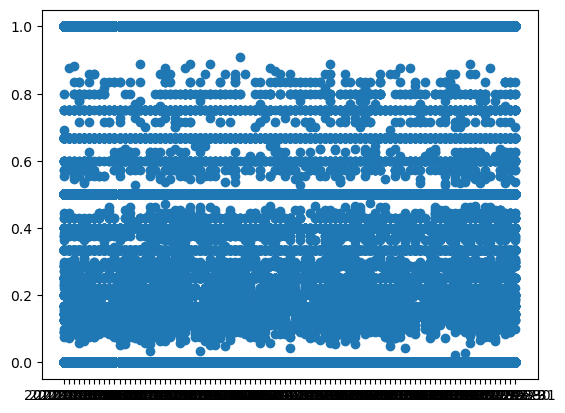

In [132]:
fig, ax = plt.subplots()
ax.scatter(df_train.date, (df_train.returned/df_train.registrations));

So that aren't good plots, but I've tried to parse dates and I haven't gotten better one.
Only what I see from plots and cross tab(month vs returned) is that returned = 22 is outlier, or maybe all values greater than 15

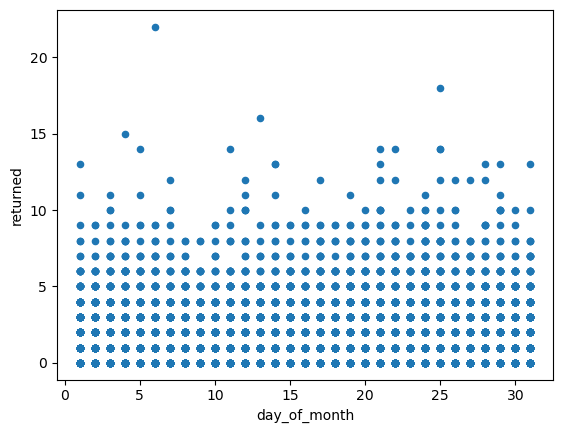

In [142]:
df_train.plot(x='day_of_month', y='returned',kind='scatter');

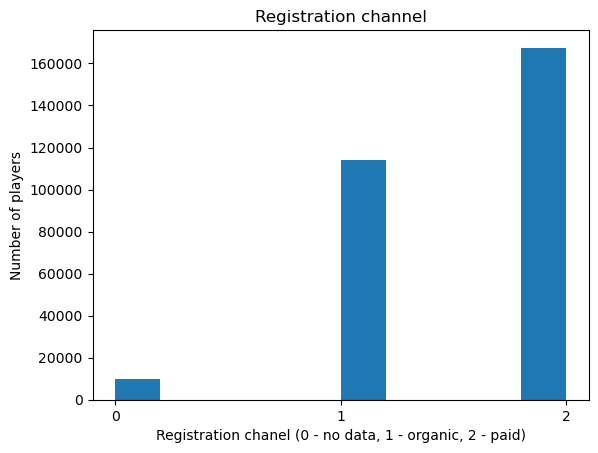

In [143]:
fig, ax = plt.subplots()
ax.hist(df_train.registration_channel);
ax.set(title = "Registration channel",
       xlabel = "Registration chanel (0 - no data, 1 - organic, 2 - paid)",
       ylabel = "Number of players")
plt.xticks([0,1,2]);

We can see that most of new users were targeted by any T11 marketing campaigns, before installing the game.

#### Month vs returned (returned/registrations)

In [144]:
pd.crosstab(df_train.month, df_train.returned)

returned,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,22
month,,,,,,,,,,,,,,,,,,,
6,57203,30388,3721,989,329,148,92,31,21,16,9,3,4,2,2,1,1,0,0
7,59486,31360,3563,969,370,151,81,36,23,13,8,2,2,1,1,0,0,0,1
8,62505,33947,4017,1084,425,174,102,42,43,19,9,3,3,4,3,0,0,1,0


In [145]:
pd.crosstab(df_train.registration_type, df_train.returned)

returned,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,22
registration_type,,,,,,,,,,,,,,,,,,,
1,119913,53196,6277,1654,611,232,145,51,38,22,12,3,3,2,0,0,0,0,0
2,38826,11293,796,128,23,4,1,0,0,0,0,0,0,0,0,0,0,0,0
3,20455,31206,4228,1260,490,237,129,58,49,26,14,5,6,5,6,1,1,1,1


#### Retention Day 1 

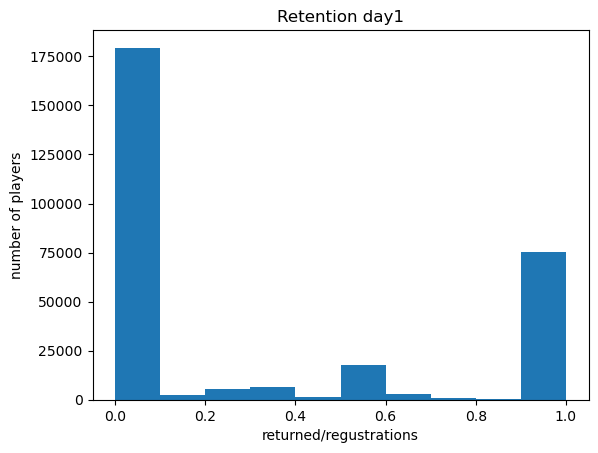

In [84]:
fig, ax = plt.subplots()
ax.hist((df_train.returned/df_train.registrations));
ax.set(title="Retention day1",
      xlabel="returned/regustrations",
      ylabel="number of users");

[Text(0.5, 0, 'Device manufacturer')]

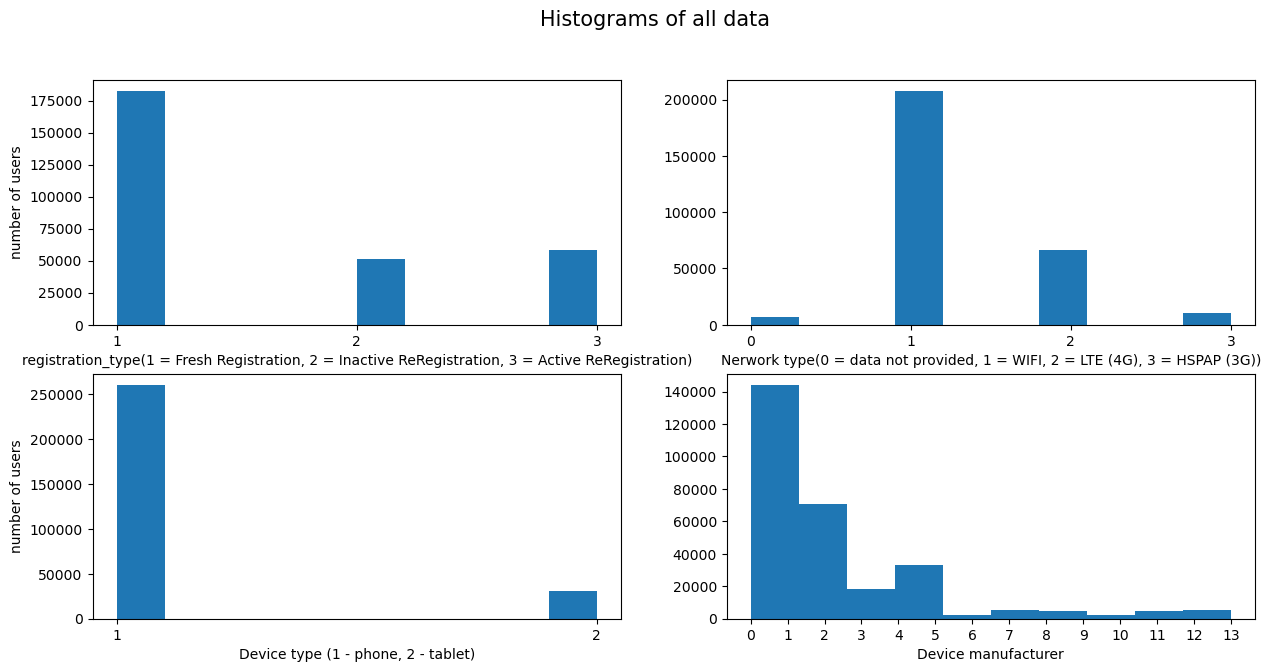

In [199]:
fig,((ax1, ax2),(ax3, ax4))=plt.subplots(nrows=2,
                                         ncols=2,
                                        figsize=(15,7))
fig. suptitle("Histograms of all data", fontsize=15)
ax1.hist(df_train.registration_type)
ax1.set(xlabel="registration_type(1 = Fresh Registration, 2 = Inactive ReRegistration, 3 = Active ReRegistration)",
       ylabel="number of users")
ax1.set_xticks([1,2,3])
ax2.hist(df_train.network_type)
ax2.set_xticks([0,1,2,3])
ax2.set(xlabel="Nerwork type(0 = data not provided, 1 = WIFI, 2 = LTE (4G), 3 = HSPAP (3G))")
ax3.hist(df_train.device_type)
ax3.set_xticks([1,2])
ax3.set(xlabel='Device type (1 - phone, 2 - tablet)',
       ylabel="number of users")
ax4.hist(df_train.device_manufacturer)
ax4.set_xticks(range(0,14));
ax4.set(xlabel="Device manufacturer")

In [197]:
df_train_returned_over_5 = df_train[df_train.returned>5]
df_train_returned_over_5.shape

(579, 17)

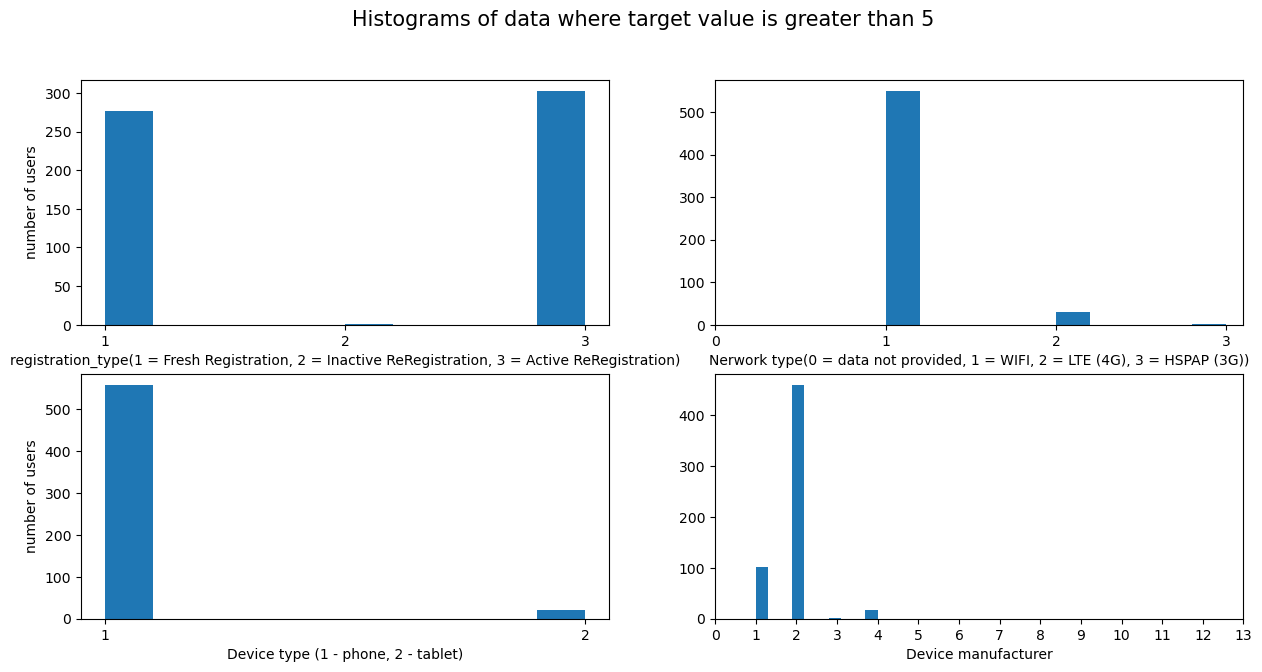

In [203]:
fig,((ax1, ax2),(ax3, ax4))=plt.subplots(nrows=2,
                                         ncols=2,
                                        figsize=(15,7))
fig. suptitle("Histograms of data where target value is greater than 5", fontsize=15)
ax1.hist(df_train_returned_over_5.registration_type)
ax1.set(xlabel="registration_type(1 = Fresh Registration, 2 = Inactive ReRegistration, 3 = Active ReRegistration)",
       ylabel="number of users")
ax1.set_xticks([1,2,3])
ax2.hist(df_train_returned_over_5.network_type)
ax2.set_xticks([0,1,2,3])
ax2.set(xlabel="Nerwork type(0 = data not provided, 1 = WIFI, 2 = LTE (4G), 3 = HSPAP (3G))")
ax3.hist(df_train_returned_over_5.device_type)
ax3.set_xticks([1,2])
ax3.set(xlabel='Device type (1 - phone, 2 - tablet)',
       ylabel="number of users")
ax4.hist(df_train_returned_over_5.device_manufacturer)
ax4.set_xticks(range(0,14));
ax4.set(xlabel="Device manufacturer");

<AxesSubplot:xlabel='registrations', ylabel='returned'>

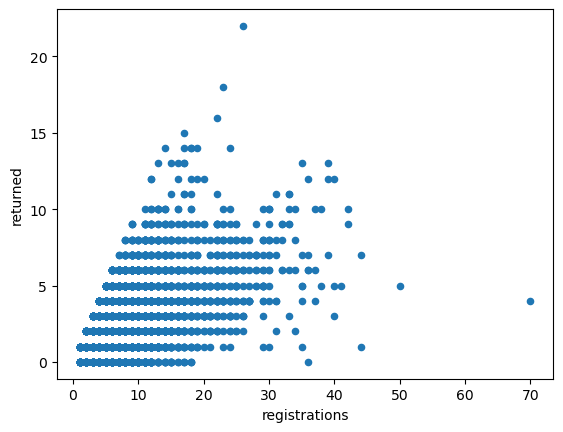

In [136]:
df_train.plot(x = 'registrations', y = 'returned', kind = 'scatter')

 We can see correlation between registrations and returned but there are a lot of exceptions.
#### Every time when I tried to plot kind='bar' my kernel chashed... Maybe because of the amount of data?
So from plots(our data) we can conclude :

                                         Most of our users are fresh registrations
                                         Most of them use Wifi and phone
                                         Most of them are samsung users
and our plot data where target values are greater than 5 shows:
                                         
                                         Most of our returned users are Active Reregistrations,
                                         use WIFI on the phone and they are Xiaomi users


### Turning data into numbers

In [209]:
df_train.dtypes

date                      object
registration_type          int64
played_t11_before          int64
registration_channel       int64
network_type               int64
device_tier                int64
device_type                int64
device_manufacturer        int64
screen_dpi               float64
device_memory_size_mb    float64
device_model              object
os_version                object
registrations              int64
returned                   int64
month                      int64
day_of_week                int64
day_of_month               int64
dtype: object

In [216]:
# date O, device_model O, os_version O
# So firstly turn string into categories
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

date
device_model
os_version


In [220]:
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label] = content.astype("category").cat.as_ordered()

C:\Users\USER\AppData\Local\Temp\ipykernel_4908\3819135548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = content.astype("category").cat.as_ordered()
C:\Users\USER\AppData\Local\Temp\ipykernel_4908\3819135548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[label] = content.astype("category").cat.as_ordered()
C:\Users\USER\AppData\Local\Temp\ipykernel_4908\3819135548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [225]:
df_train.os_version.cat.codes

0          1
1          7
2          7
3         56
4          1
          ..
293046     1
293047     9
293048     1
293049     1
293050     1
Length: 291408, dtype: int8

In [226]:
df_train.to_csv('train_data')

In [228]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49034 entries, 293051 to 342331
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   49034 non-null  object 
 1   registration_type      49034 non-null  int64  
 2   played_t11_before      49034 non-null  int64  
 3   registration_channel   49034 non-null  int64  
 4   network_type           49034 non-null  int64  
 5   device_tier            49034 non-null  int64  
 6   device_type            49034 non-null  int64  
 7   device_manufacturer    49034 non-null  int64  
 8   screen_dpi             49034 non-null  float64
 9   device_memory_size_mb  49034 non-null  float64
 10  device_model           49034 non-null  object 
 11  os_version             49034 non-null  object 
 12  registrations          49034 non-null  int64  
 13  returned               49034 non-null  int64  
 14  month                  49034 non-null  int64  
 

In [229]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

C:\Users\USER\AppData\Local\Temp\ipykernel_4908\3145692808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[label] = content.astype("category").cat.as_ordered()
C:\Users\USER\AppData\Local\Temp\ipykernel_4908\3145692808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[label] = content.astype("category").cat.as_ordered()
C:\Users\USER\AppData\Local\Temp\ipykernel_4908\3145692808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [230]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49034 entries, 293051 to 342331
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   date                   49034 non-null  category
 1   registration_type      49034 non-null  int64   
 2   played_t11_before      49034 non-null  int64   
 3   registration_channel   49034 non-null  int64   
 4   network_type           49034 non-null  int64   
 5   device_tier            49034 non-null  int64   
 6   device_type            49034 non-null  int64   
 7   device_manufacturer    49034 non-null  int64   
 8   screen_dpi             49034 non-null  float64 
 9   device_memory_size_mb  49034 non-null  float64 
 10  device_model           49034 non-null  category
 11  os_version             49034 non-null  category
 12  registrations          49034 non-null  int64   
 13  returned               49034 non-null  int64   
 14  month                  49034 non

In [231]:
df_test.to_csv("test_data")